# Logistic Regression 

### Useful Imports

In [29]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


#### Some global variables that can be used to check specific outputs

In [30]:
debug = 1  # 1 if you want to see the variable values during the program execution
graphing = 1  # 1 to see the graphs

## STEP 1: LOADING THE DATASET AND VISUALISING IT

In [31]:
# read dataset (data.csv) using pandas.read_pickle. Note: this command will return a numpy array 
names =[
    'location',
    'country',
    'gender',
    'age',
    'vis_wuhan', 'from_wuhan',
    'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
    'diff_sym_hos',
    'result'
]
data_set=  pd.read_csv("data.csv") # data inside data.pkl saved in numpy array 
# print the size of the dataset i.e the length of the numpy array
data_set_size = len(data_set)
print(data_set_size )


863


Print the first six lines of the pandas dataframe and manually check that they match the first rows of the csv file.

In [32]:
data_set.head(6)

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0


## Visualize the data

Text(0, 0.5, 'I2')

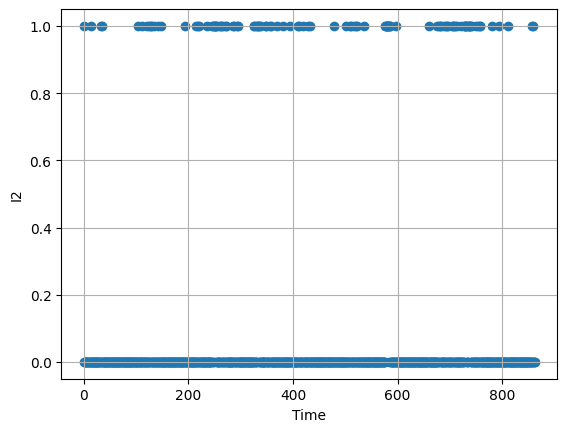

In [33]:
id= data_set['Unnamed: 0']
# print(t)
result = data_set['result']
# print(y)

plt.scatter(id,result)
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("I2")

## Extract Y Training

In [34]:
Result_Training = data_set['result']
Features_Training = data_set[[
    'location',
    'country',
    'gender',
    'age',
    'vis_wuhan', 'from_wuhan',
    'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
    'diff_sym_hos']]
print(Features_Training)

     location  country  gender   age  vis_wuhan  from_wuhan  symptom1   
0         104        8       1  66.0          1           0        14  \
1         101        8       0  56.0          0           1        14   
2         137        8       1  46.0          0           1        14   
3         116        8       0  60.0          1           0        14   
4         116        8       1  58.0          0           0        14   
..        ...      ...     ...   ...        ...         ...       ...   
858        48        3       2  24.0          0           0        14   
859         0        0       2  35.0          0           0        14   
860         3        1       1  49.4          0           0        14   
861        24        9       1  49.4          0           0        14   
862        15       27       1  70.0          0           0        14   

     symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  
0          31        19        12         3         1

## split data to test and training

In [35]:
X_train, X_test, y_train, y_test = train_test_split(Features_Training, Result_Training,test_size=0.2, random_state = 1)
print(X_train)

     location  country  gender   age  vis_wuhan  from_wuhan  symptom1   
207        51       18       1  55.0          0           1         6  \
61        132        8       1  52.0          1           0        14   
853        10        4       1  49.4          0           0        14   
345        44       18       1  55.0          0           0        14   
838        61       19       2  49.4          0           0        14   
..        ...      ...     ...   ...        ...         ...       ...   
715        45       13       1  51.0          0           0         6   
767       122       31       2  49.4          0           0        14   
72        135        8       0  39.0          1           0        14   
235       128       18       0  85.0          0           0        14   
37         13        8       0  33.0          0           1        14   

     symptom2  symptom3  symptom4  symptom5  symptom6  diff_sym_hos  
207        31        19        12         3         1

## Fit the model for KNN

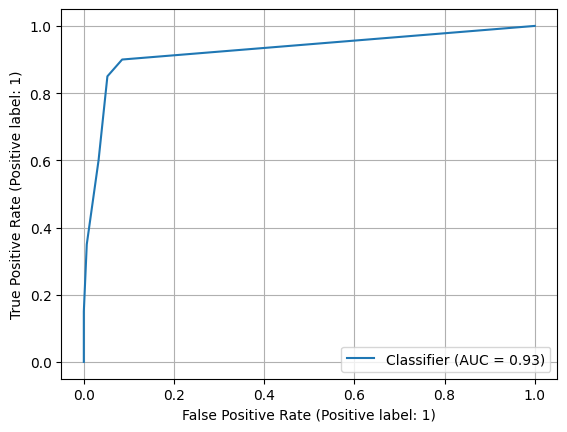

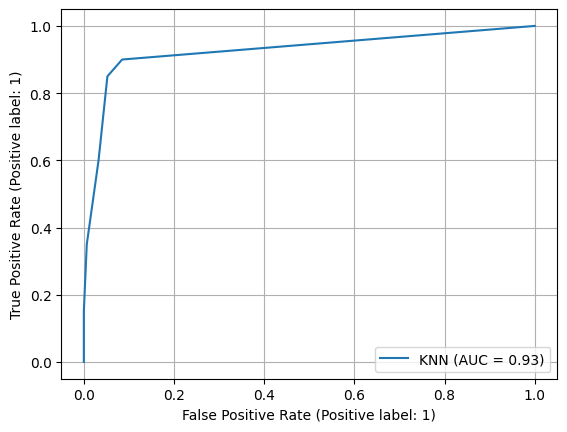

In [104]:
import math as mth
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, f1_score, precision_score, recall_score, confusion_matrix
# k = mth.isqrt(data_set_size)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
ypred_KNN= knn.predict(X_test) #These are the predicted output values

# Assuming knn is a trained KNeighborsClassifier
y_pred_probabilities = knn.predict_proba(X_test)[:, 1]

# Use the same predicted probabilities in both methods
RocCurveDisplay.from_predictions(y_test, y_pred_probabilities)
plt.grid()
plt.show()

RocCurveDisplay.from_estimator(knn, X_test, y_test, name="KNN")
plt.grid()
plt.show()


## Fit the model for Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
ypred_logreg = logreg.predict(X_test)

c:\Users\hebas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Fit the model for Naive Bayes

Training with K-Folds 

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, f1_score, precision_score, recall_score, confusion_matrix

# Number of splits for KFold cross-validation
n_splits = 10

# Scoring metric of interest
scoring_metric = recall_score

# Initialize variables to track the best classifier and its corresponding recall score
max_recall_score = 0
best_naive_classifier = GaussianNB()

# Initialize KFold cross-validation
kf = KFold(n_splits=n_splits)

# Perform KFold cross-validation
for train_index, test_index in kf.split(X_train):

    # Split the data into training and validation sets
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[test_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[test_index]

    # Create a new Naive Bayes classifier
    current_naive_classifier = GaussianNB()

    # Fit the classifier to the training data
    current_naive_classifier.fit(X_fold_train, y_fold_train)

    # Make predictions on the validation set
    y_val_predicted = current_naive_classifier.predict(X_fold_val)

    # Calculate the score on the validation set
    cv_score = scoring_metric(y_true=y_fold_val, y_pred=y_val_predicted)

    # Update the best classifier if the current score is higher
    if cv_score > max_recall_score:
        best_naive_classifier = current_naive_classifier
        max_recall_score = cv_score

# Print the best classifier and its corresponding recall score
print(f"{best_naive_classifier = }\n{max_recall_score = }")


best_naive_classifier = GaussianNB()
max_recall_score = 1.0


Testing

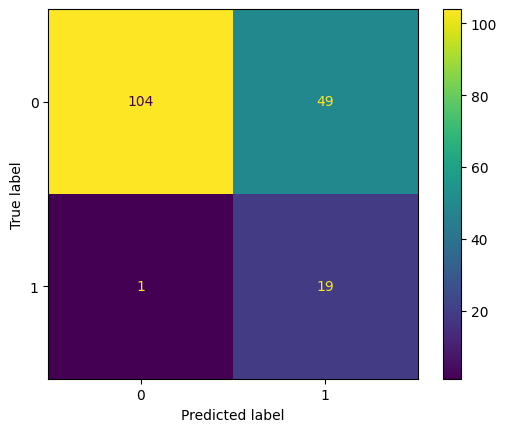

naive_model_f1-score = 0.43181818181818177
naive_model-precision = 0.27941176470588236
naive_model-Recall = 0.95


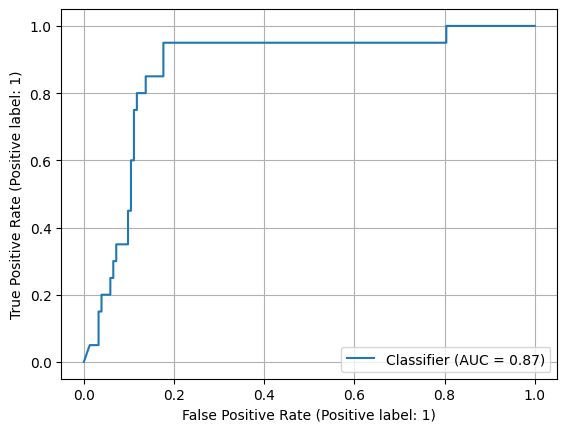

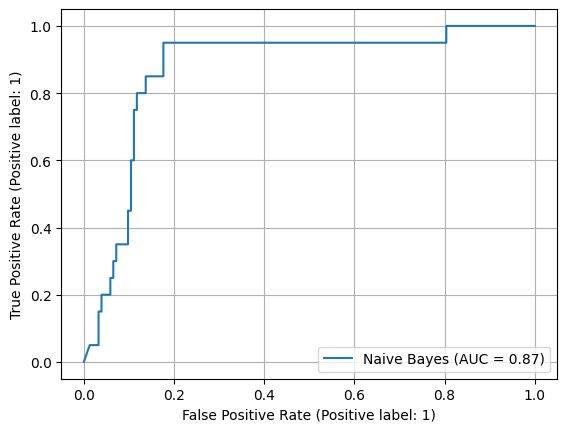

In [68]:
# Testing
y_pred_naive = best_naive_classifier.predict(X_test) ########
y_pred_prob_naive = best_naive_classifier.predict_proba(X_test)[:, 1]

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred_naive)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_naive_classifier.classes_)
disp.plot()
plt.show()

# f1-score
print(f"naive_model_f1-score = {f1_score(y_test, y_pred_naive)}\nnaive_model-precision = {precision_score(y_test, y_pred_naive)}\nnaive_model-Recall = {recall_score(y_test, y_pred_naive)}")

# ROC curve 
RocCurveDisplay.from_predictions(y_test, y_pred_prob_naive)
plt.grid()
plt.show()
# ROC curve 
RocCurveDisplay.from_estimator(best_naive_classifier, X_test, y_test, name="Naive Bayes")
plt.grid()
plt.show()



# Fit for Desicion Trees

 Hyper Parameters Tuning

In [40]:
DT_param_grid = [
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': list(range(4,13,2))
    }
]

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Specify the scoring metric for grid search, in this case, Recall
scoring_metric = 'recall'

# Perform GridSearchCV to find the best Decision Tree classifier
best_decision_tree_clf_cv = GridSearchCV(decision_tree_classifier, param_grid=DT_param_grid, cv=10, scoring=scoring_metric)


Training

In [96]:
best_decision_tree_classifier = best_decision_tree_clf_cv.fit(X_train,y_train).best_estimator_
#best_decision_tree_classifier= decision_tree_classifier.fit(X_train,y_train)

In [97]:
print(f"{best_decision_tree_classifier.max_depth = }\n{best_decision_tree_classifier.criterion = }")

best_decision_tree_classifier.max_depth = 8
best_decision_tree_classifier.criterion = 'entropy'


Plotting Tree

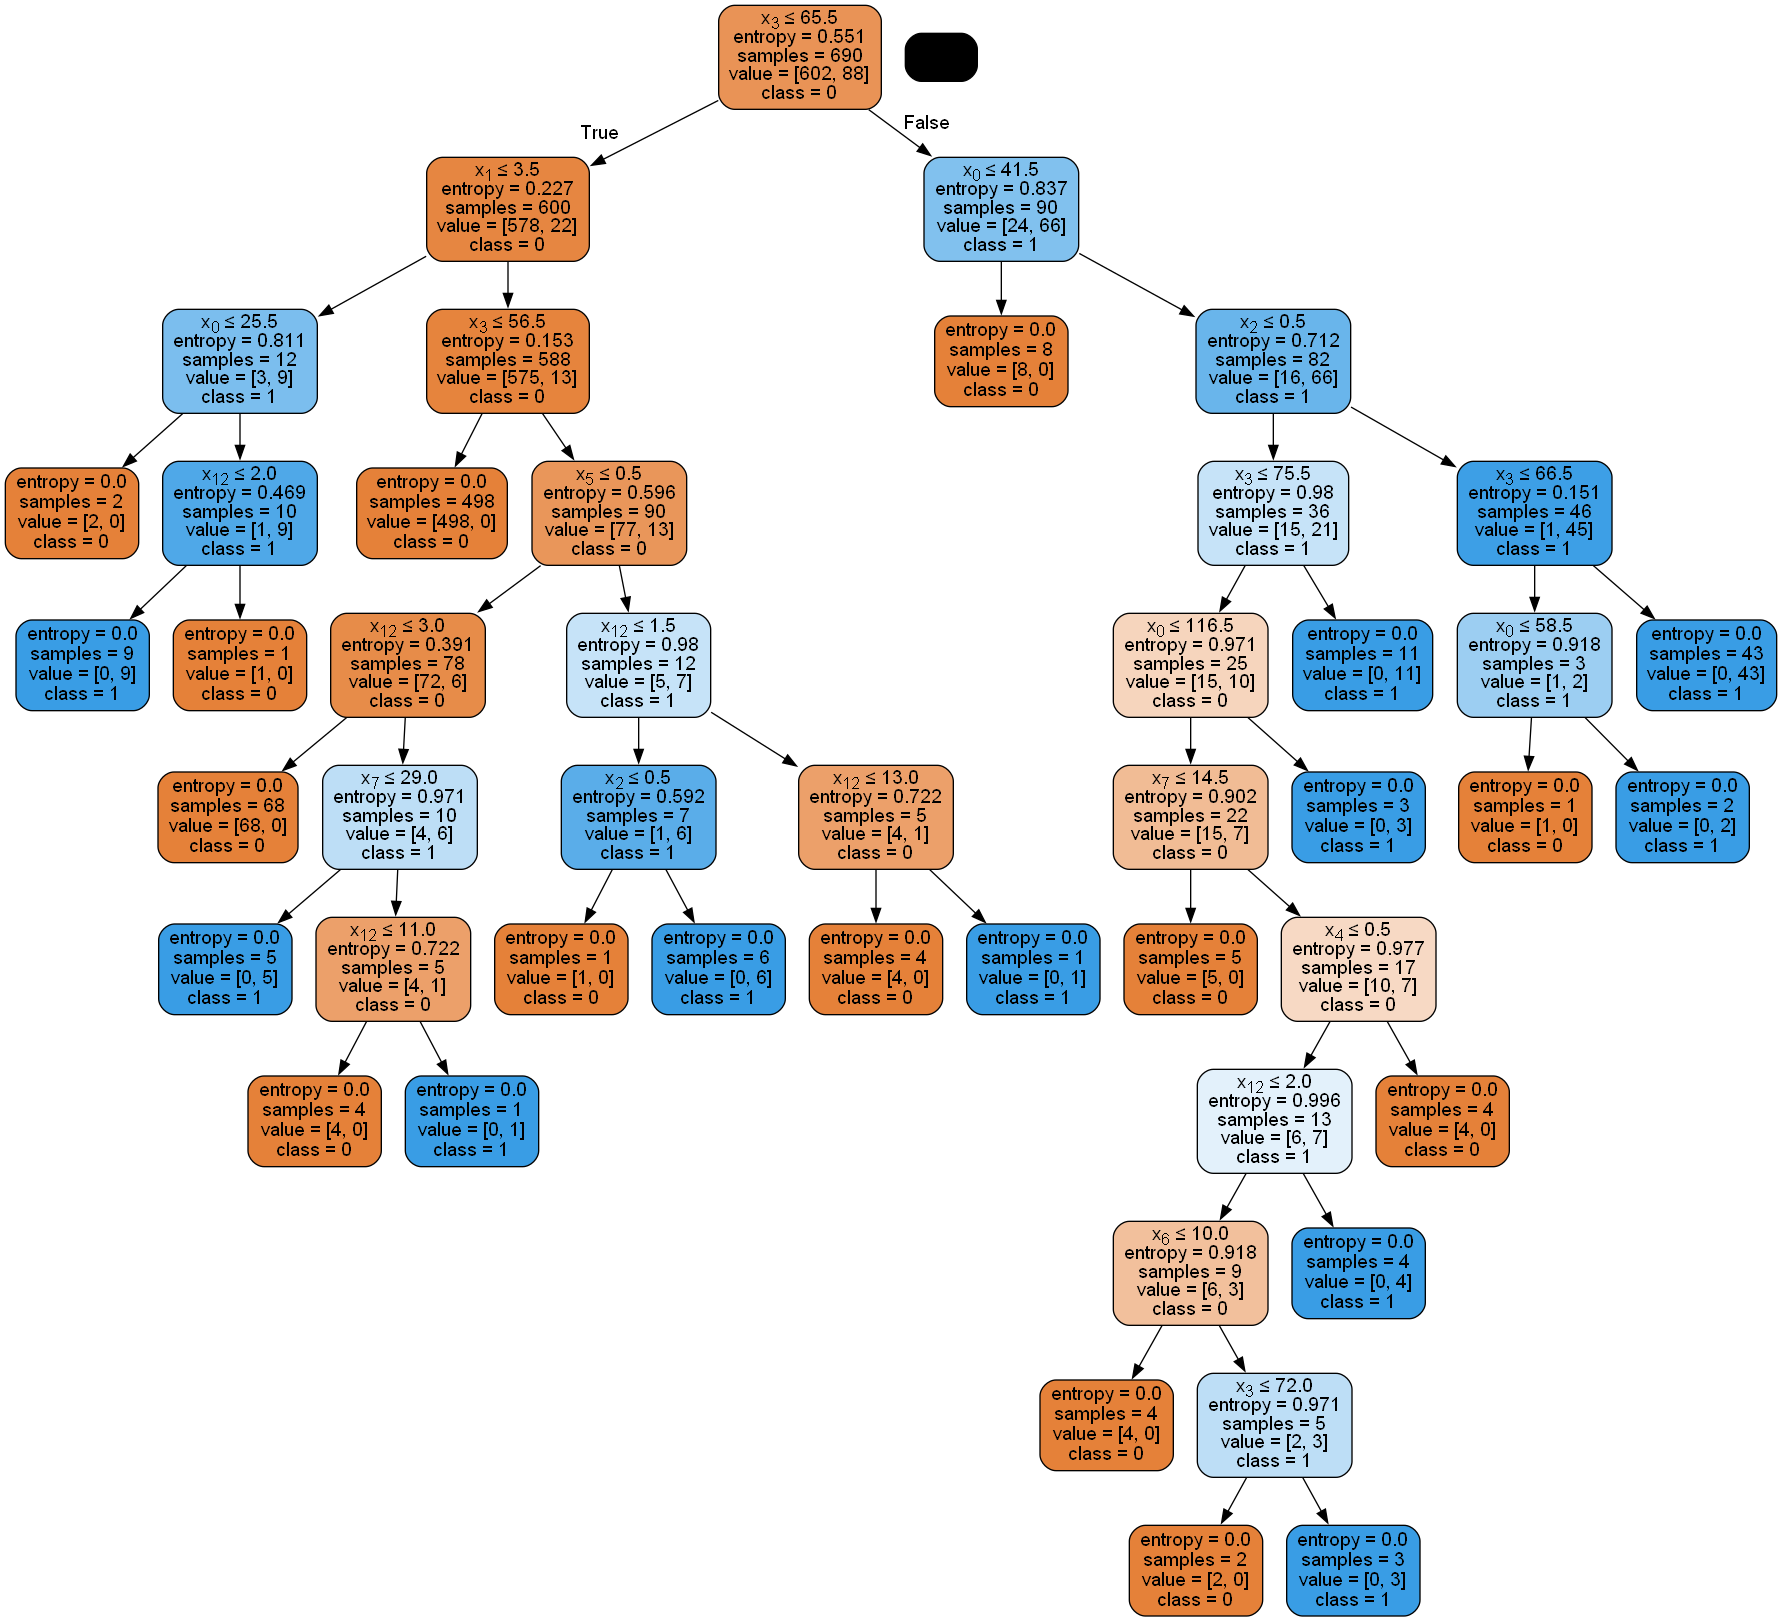

In [94]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(best_decision_tree_classifier, out_file=dot_data, rounded=True,
                filled=True, special_characters=True, class_names=["0", "1"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("COVID-19.png")
Image(graph.create_png())

Testing

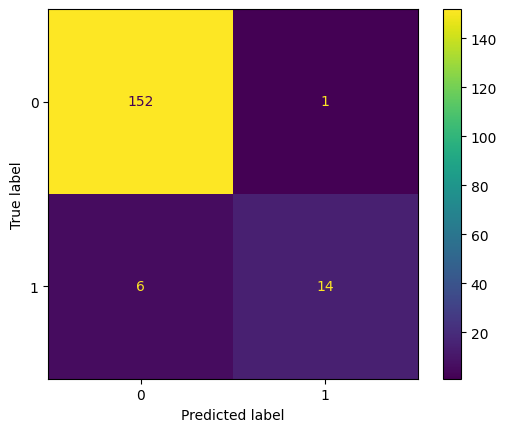

DT_model_f1-score = 0.8
DT_model-precision = 0.9333333333333333
DT_model-Recall = 0.7


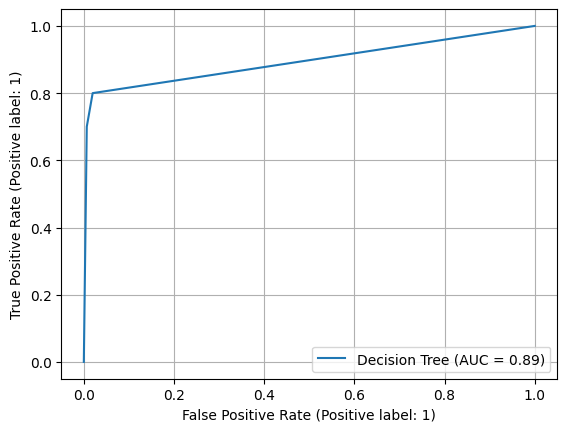

In [98]:

# making predictions
y_pred_DT = best_decision_tree_classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_decision_tree_classifier.classes_)
disp.plot()
plt.show()

# Precision, Recall, f1-score
print(f"DT_model_f1-score = {f1_score(y_test, y_pred_DT)}\nDT_model-precision = {precision_score(y_test,y_pred_DT)}\nDT_model-Recall = {recall_score(y_test,y_pred_DT)}")

# ROC curve
RocCurveDisplay.from_estimator(best_decision_tree_classifier, X_test, y_test, name='Decision Tree')
plt.grid()

# Fit for SVM 

## compare the performance

Perfomance for KNN

In [46]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score ,roc_auc_score
result = f1_score(y_test, ypred_KNN)
print("f1_score:")
print(result)
recall = recall_score(y_test, ypred_KNN)
print("recall_score:",)
print (recall)
precision = precision_score(y_test,ypred_KNN)
print("precision_score:",precision)
roc_auc = roc_auc_score(y_test,ypred_KNN)
print("roc_auc_score:",roc_auc)

accuracy = accuracy_score(y_test,ypred_KNN)
print("accuracy_score:",accuracy)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1:",F1)


f1_score:
0.6486486486486486
recall_score:
0.6
precision_score: 0.7058823529411765
roc_auc_score: 0.7836601307189542
accuracy_score: 0.9248554913294798
F1: 0.6486486486486486


Performance for Logistic Regression

In [47]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score ,roc_auc_score
result = f1_score(y_test, ypred_logreg)
print("f1_score:")
print(result)
recall = recall_score(y_test, ypred_logreg)
print("recall_score:",)
print (recall)
precision = precision_score(y_test,ypred_logreg)
print("precision_score:",precision)
roc_auc = roc_auc_score(y_test,ypred_logreg)
print("roc_auc_score:",roc_auc)

accuracy = accuracy_score(y_test,ypred_logreg)
print("accuracy_score:",accuracy)
F1 = 2 * (precision * recall) / (precision + recall)
print("F1:",F1)


f1_score:
0.6857142857142857
recall_score:
0.6
precision_score: 0.8
roc_auc_score: 0.7901960784313725
accuracy_score: 0.9364161849710982
F1: 0.6857142857142857


<Figure size 800x800 with 0 Axes>

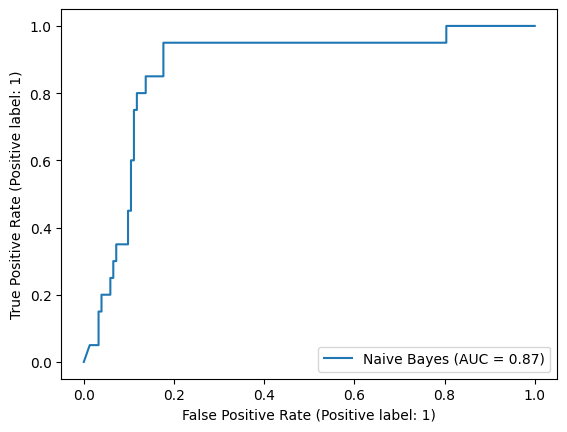

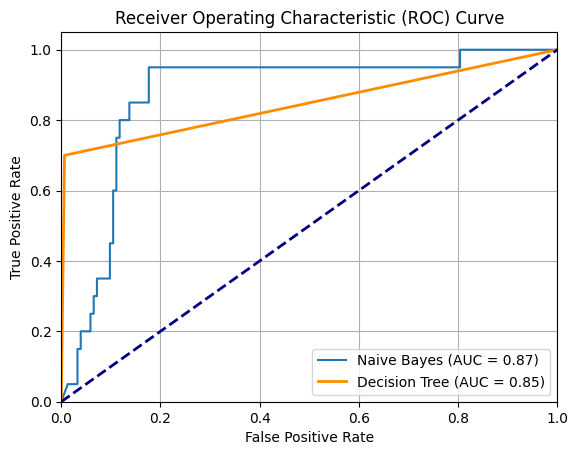

In [54]:
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt


y_score_decision_tree = best_decision_tree_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve for Decision Tree
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, y_score_decision_tree)
roc_auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)

# Plot ROC curve for Naive Bayes
plt.figure(figsize=(8, 8))

# ROC curve for Naive Bayes
display_naive = RocCurveDisplay.from_estimator(best_naive_classifier, X_test, y_test, name="Naive Bayes")
display_naive.plot()

# ROC curve for Decision Tree
plt.plot(fpr_decision_tree, tpr_decision_tree, color='darkorange', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_decision_tree)

# Plot details
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
display = RocCurveDisplay.from_estimator(best_naive_classifier, X_test, y_test,name="Naive Bayes")
RocCurveDisplay.from_estimator(logreg, X_test, y_test, ax=display.ax_ ,name="Log-Reg")
RocCurveDisplay.from_estimator(knn,X_test,y_test,ax=display.ax_,name="KNN")
RocCurveDisplay.from_estimator(best_decision_tree_classifier,X_test,y_test,ax=display.ax_,name="Decision Tree")
# RocCurveDisplay.from_estimator(best_svm_clf,X_test,y_test,ax=display.ax_,name="SVM")
plt.grid()
plt.show()

<Figure size 800x800 with 0 Axes>

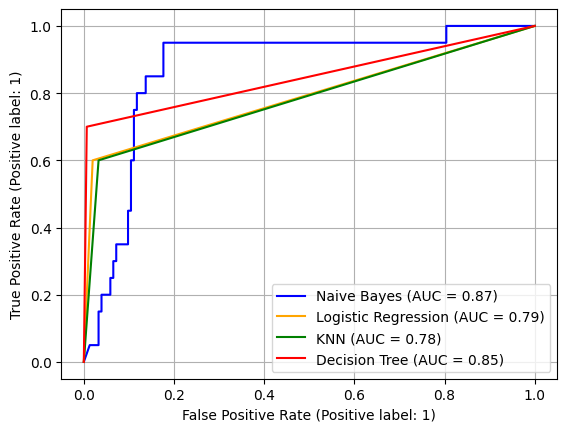

In [69]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Create and fit classifiers
naive_clf = best_naive_classifier
logreg_clf = logreg  # Assuming best_log_clf is already defined
knn_clf = knn    # Assuming best_knn_clf is already defined
decision_tree_clf = best_decision_tree_classifier  # Assuming best_DT_clf is already defined
 # Assuming best_svm_clf is already defined

# Plot all ROC curves on the same graph with different colors
plt.figure(figsize=(8, 8))

# ROC curve for Naive Bayes (color='blue')
display = RocCurveDisplay.from_predictions( y_test,y_pred_prob_naive, color='blue', name="Naive Bayes")

# ROC curve for Logistic Regression (color='orange')
RocCurveDisplay.from_predictions( y_test, ypred_logreg, ax=display.ax_, color='orange', name="Logistic Regression")

# ROC curve for KNN (color='green')
RocCurveDisplay.from_predictions(y_test,ypred_KNN, ax=display.ax_, color='green', name="KNN")

# ROC curve for Decision Tree (color='red')
RocCurveDisplay.from_predictions( y_test,y_pred_DT, ax=display.ax_, color='red', name="Decision Tree")

plt.grid()
plt.show()
